## Resposta em frequência de um sistema SISO - critério de Nyquist e carta de Nichols

As **características da resposta em malha fechada** de um sistema SISO podem ser inferidas **a partir da análise da função de transferência em malha aberta**: 
$$L(s) = G(s) H(s) = K \frac{N(s)}{D(s)}$$
com:
*  $G(s)$ sendo a função de transferência equivalente ao canal direto;
*  $H(s)$ sendo a função de transferência equivalente ao canal de realimentação. 

Em particular, sabemos que a função de transferência em **malha fechada** é dada por: 
$$T(s) = \frac{G(s)}{1 + L(s)}$$

A partir da condição necessária para que um valor de $s \in \mathbb{C}$ seja um **polo do sistema em malha fechada**:
$$
1 + L(s) = 0 \quad \Rightarrow \quad 
|L(s)| = 1
\quad \text{e} \quad
\phase{L(s)} \equiv 180^\circ
$$
definimos as **margens de estabilidade**:

* **Margem de ganho (GM)**:
$$
\text{GM} = \frac{1}{|L(\mathsf{j} \omega_c)|}
\qquad \text{ou} \qquad 
\text{GM(dB)} = - 20 \log_{10} |L(\mathsf{j} \omega_c)|
$$
* **Margem de fase (PM)**:
$$
\text{PM} = 180^\circ + \phase{L(\mathsf{j} \omega_\phi)}
\qquad \text{com} \qquad
\phase{L(\mathsf{j} \omega_\phi)} < 0
$$
com:
* $\omega_\phi$: frequência de ganho crítico (*gain crossover*), para a qual $20 \log_{10} |L(\mathsf{j} \omega_\phi)| = 0 \ \text{dB}$ ;
* $\omega_c$: frequência de fase crítica (*phase crossover*), para a qual $\phase{L(\mathsf{j} \omega_c)} = -180^\circ$.

Outra forma forma de avaliar a estabilidade é por meio da resposta em frequência da **função de sensibilidade**:
$$
S(\mathsf{j} \omega) = \frac{1}{1 + L(\mathsf{j} \omega)}
$$
Em particular, o valor de $\omega = \omega_s$ para o qual $|S(\mathsf{j} \omega)|$ é máximo, corresponde ao ponto do eixo imaginário cuja imagem por $L(s)$ está o mais próximo possível do ponto crítico $-1$, uma vez que o valor $|1 + L(\mathsf{j} \omega_s)|$ será mínimo.

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import control as ct

In [2]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### Critério de Nyquist

Considere:
* $N$: *número líquido* de voltas no *sentido-horário* que a imagem de $L(\mathsf{j} \omega)$, $-\infty < \omega < +\infty$, dá ao redor do ponto $s = -1$;
* $Z_R$: *número de zeros da função $F(s) = 1 + L(s)$ no semi-plano direito*;
* $P_R$: *número de polos da função $F(s)$ no semi-plano direito*.

Como corolário do **Princípio do Argumento de Cauchy**, vale a seguinte relação:
$$
N = Z_R - P_R
$$

Observe que:
* os *polos* de $F(s)$ coincidem com os polos de $L(s)$, ou seja, são **polos em malha aberta**;
* os *zeros* de $F(s)$ são os valores de $s \in \mathbb{C}$ tais que $L(s) = -1$, ou seja, são **polos em malha fechada**

Assim, a equação acima pode ser interpretada como:

**O número líquido $N$ de voltas  no *sentido-horário* que a imagem de $L(\mathsf{j} \omega)$, $-\infty < \omega < +\infty$, dá ao redor do ponto $s = -1$ é igual à diferença entre o número de polos do sistema em *malha fechada* e o número de polos do sistema em *malha aberta*.**

Para a **estabilidade em malha fechada**, é necessário que $Z_R = 0$, ou seja:
$$
N = -P_R
$$

Em outras palavras:
* para um sistema já estável em malha aberta, a malha fechada será estável se a imagem de $L(\mathsf{j} \omega)$, $-\infty < \omega < +\infty$, não contornar o ponto $s = -1$.
* para um sistema instável em malha aberta, a malha fechada será estável se o número de contornos no **sentido anti-horário** em torno do ponto $s = -1$ pela imagem de $L(\mathsf{j} \omega)$, $-\infty < \omega < +\infty$, for exatamente igual ao número de polos instáveis em malha aberta.

### Carta de Nichols

Alternativamente ao diagrama de Bode, que usa dois gráficos para representar $20 \log_{10} |L(\mathsf{j} \omega)| \ \text{(dB)}$ vs. $\omega$ e $\phase{L(\mathsf{j} \omega)} \ {({}^\circ)}$ vs. $\omega$, a carta de Nichols é um diagrama da forma $20 \log_{10} |L(\mathsf{j} \omega)| \ \text{(dB)}$ vs. $\phase{L(\mathsf{j} \omega)}$. 

Para um **sistema estável em malha fechada**, a curva do diagrama deverá passar à **direita do ponto $(\pm 180^\circ, 0 \ \text{dB})$** mais próximo. 

As linhas de grade da carta de Nichols permitem prever os valores de ganho $20 \log_{10} |T(\mathsf{j} \omega)| \ \text{(dB)}$ e fase $\phase{T(\mathsf{j} \omega)} \ {({}^\circ)}$ da função de trasferência de malha fechada quando se admite **realimentação unitária**, ou seja, quando:
$$
T(s) = \frac{G(s)}{1 + G(s)}
$$

#### EXEMPLO 1 - Sistema estável em MA do tipo $m=0$

In [3]:
L_m0 = ct.tf([1], [1, 3, 2, 1])
L_m0

TransferFunction(array([1]), array([1, 3, 2, 1]))

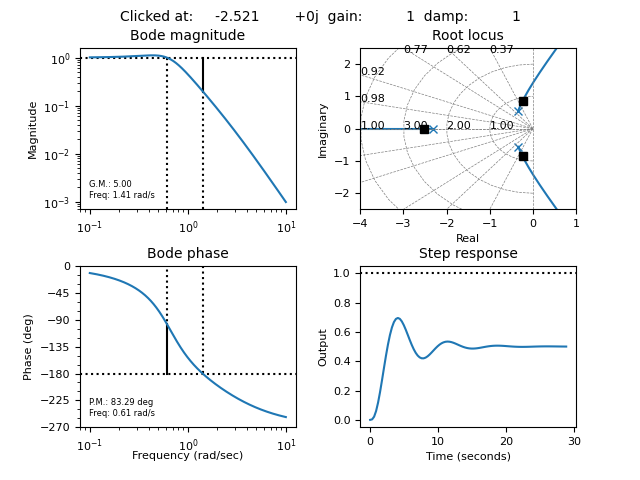

In [4]:
ct.sisotool(L_m0, xlim_rlocus=(-4, 1), ylim_rlocus=(-2.5, 2.5),
            rlocus_grid=True)

0

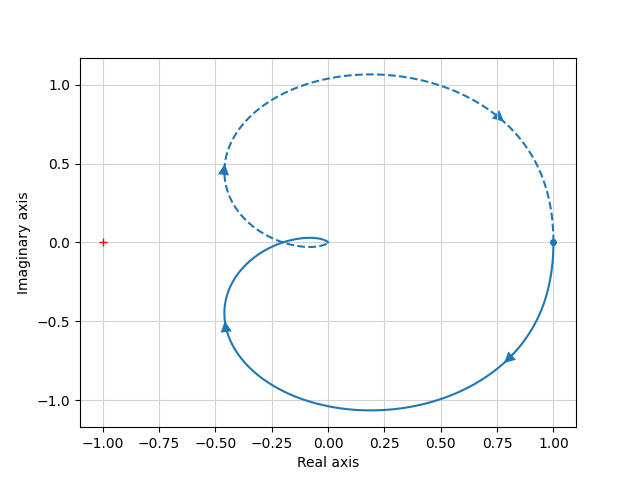

In [5]:
# ganho K_c = 1 (estável em MF)
plt.figure()
ct.nyquist_plot(1 * L_m0)

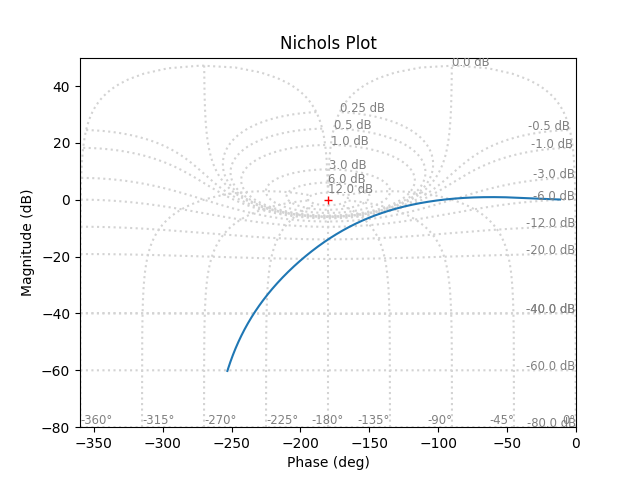

In [6]:
# ganho K_c = 1 (estável em MF)
plt.figure()
ct.nichols_plot(1 * L_m0)

2

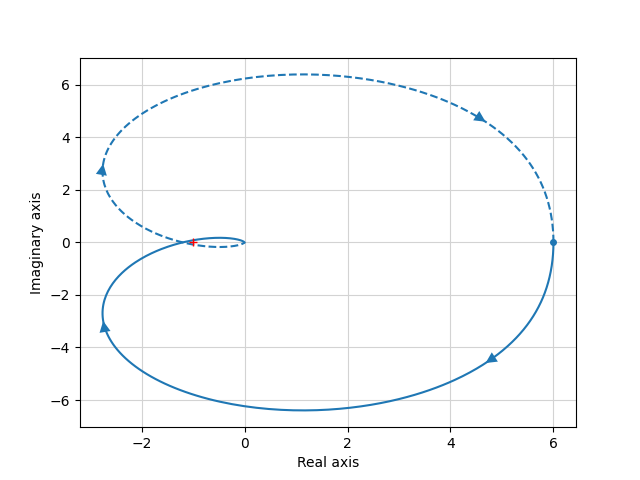

In [7]:
# ganho K_c = 6 (instável em MF)
plt.figure()
ct.nyquist_plot(6 * L_m0)

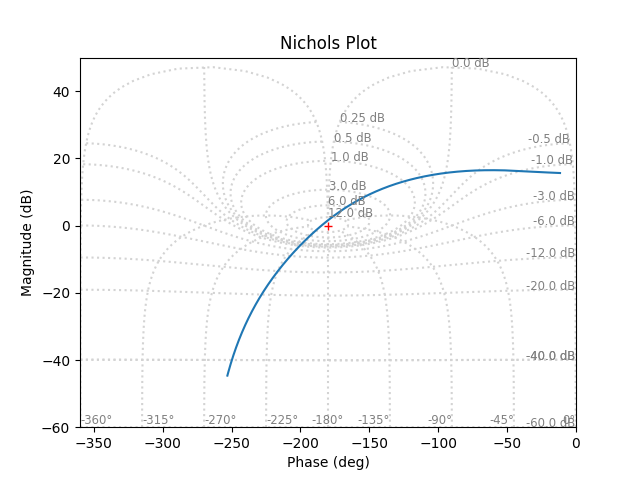

In [8]:
# ganho K_c = 6 (instável em MF)
plt.figure()
ct.nichols_plot(6 * L_m0)

#### EXEMPLO 2 - Sistema instável em MA do tipo $m = 1$

Adaptado do exemplo A-6-19 do livro: 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

que visa representar um *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
   L(s) = \frac{K (s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

Dessa forma, $P_R = 1$, ou seja, em malha aberta há um polo no semi-plano direito em $s=+1$.

Vimos que, nestas condições, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K$) se, e somente se: $$23.32 < K < 35.68$$

In [9]:
L_m1 = ct.tf([1, 1], [1, 3, 12, -16, 0])
L_m1

TransferFunction(array([1, 1]), array([  1,   3,  12, -16,   0]))

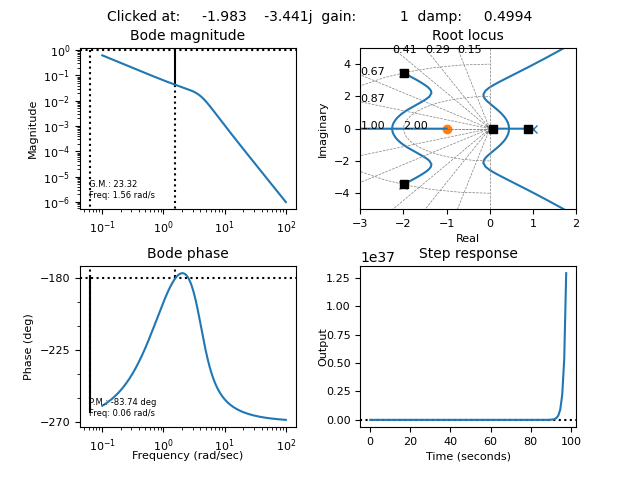

In [10]:
plt.figure()
ct.sisotool(L_m1, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)

1

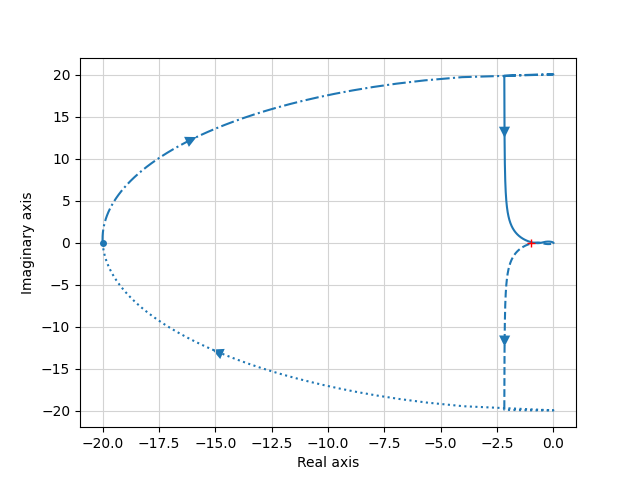

In [11]:
# ganho K_c = 20 (instável em MF)
plt.figure()
ct.nyquist_plot(20 * L_m1)

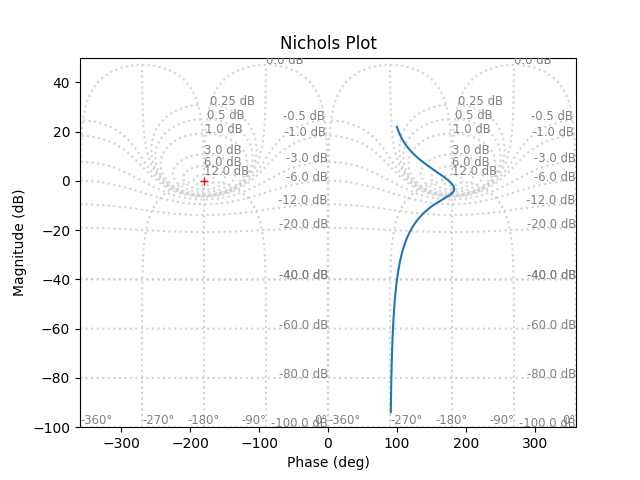

In [12]:
# ganho K_c = 20 (instável em MF)
plt.figure()
ct.nichols_plot(20 * L_m1)

-1

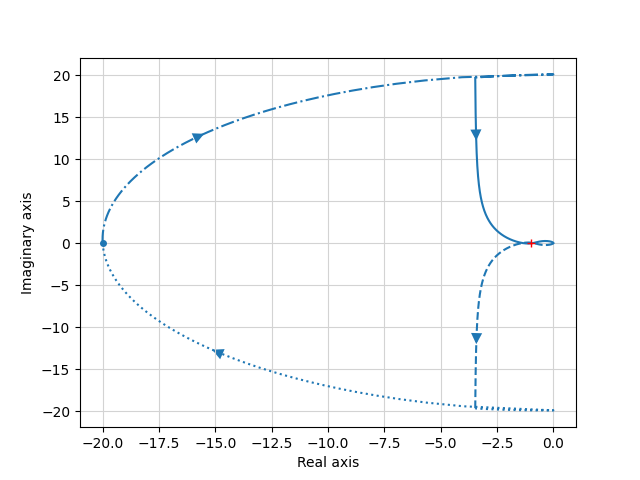

In [13]:
# ganho K_c = 32 (estável em MF)
plt.figure()
ct.nyquist_plot(32 * L_m1)

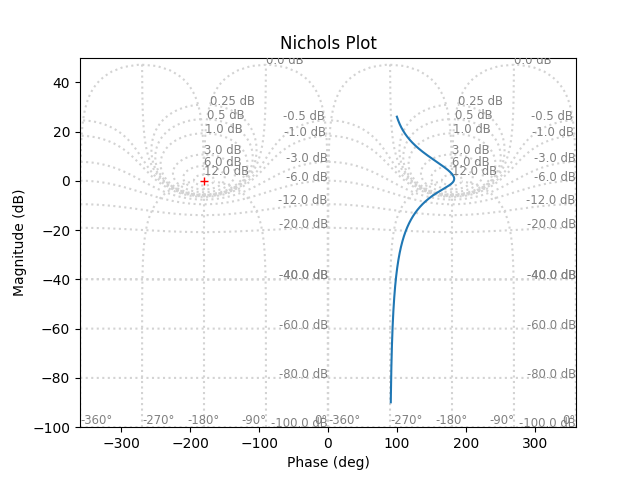

In [14]:
# ganho K_c = 32 (estável em MF)
plt.figure()
ct.nichols_plot(32 * L_m1)

#### EXEMPLO 3 - Sistema estável em MA do tipo $m=2$

Considere a associação da planta do item anterior ao compensador PID anteriormente projetado para ela via lugar das raízes:

In [15]:
τ_i = 12.0
τ_d = 3.6667
G_c_PID = 15 * ct.tf([τ_d, 1, 1/τ_i], [1, 0])
L_m2 = G_c_PID * L_m1
L_m2

TransferFunction(array([55.0005, 70.0005, 16.25  ,  1.25  ]), array([  1,   3,  12, -16,   0,   0]))

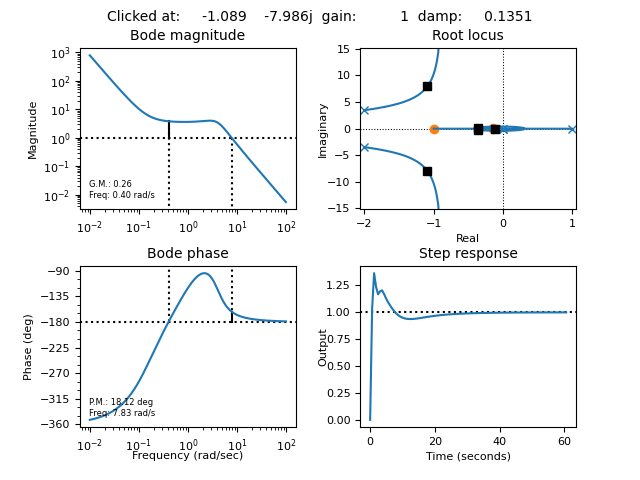

In [16]:
plt.figure()
ct.sisotool(L_m2)

-1

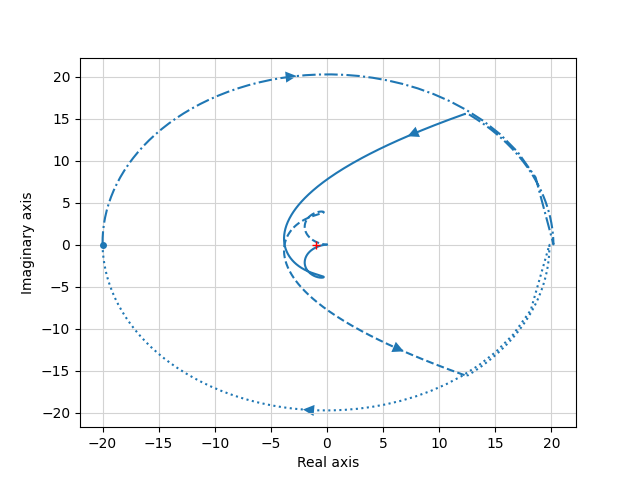

In [17]:
# ganho K_c = 1 (estável em MF)
plt.figure()
ct.nyquist_plot(1 * L_m2)

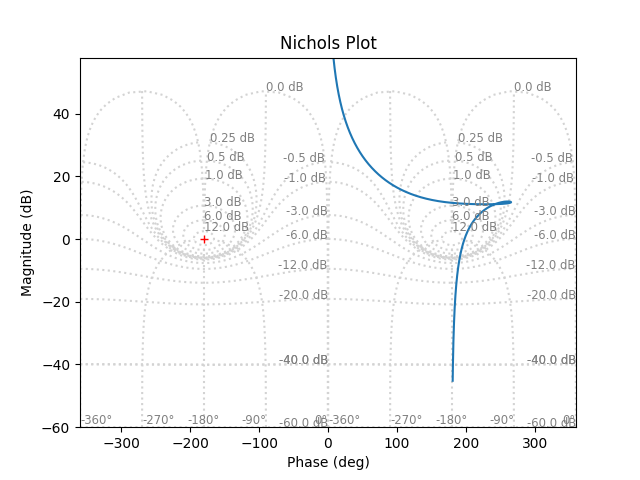

In [18]:
# ganho K_c = 1 (estável em MF)
plt.figure()
ct.nichols_plot(1 * L_m2)

1

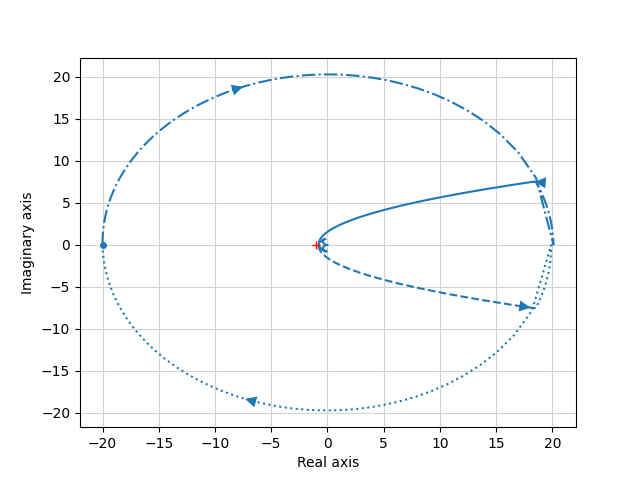

In [19]:
# ganho K_c = 0.1 (instável em MF)
plt.figure()
ct.nyquist_plot(0.2 * L_m2)

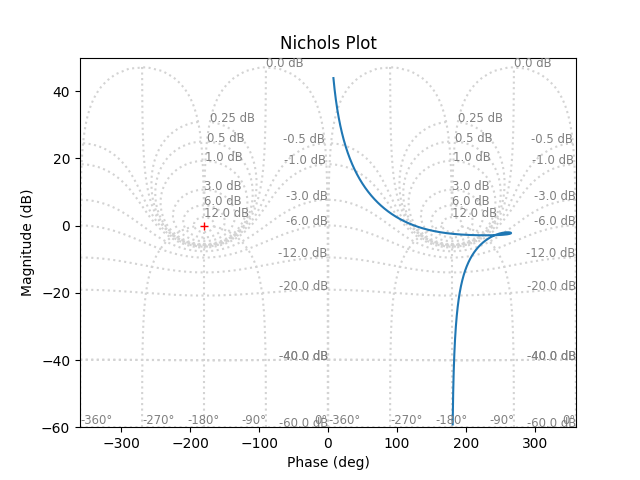

In [20]:
# ganho K_c = 0.1 (instável em MF)
plt.figure()
ct.nichols_plot(0.2 * L_m2)